In [19]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt


plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

In [23]:
h5py.File('datasets_temp/1.hdf5').keys()

<KeysViewHDF5 ['Covariances', 'Expected_returns', 'Final_circuit_sample_probabilities', 'Final_circuit_sample_states', 'Max_cost', 'Min_cost', 'N', 'Normalized_cost', 'Optimizer_maxfev', 'Optimizer_nfev', 'Rng_seed', 'k', 'layers', 'type']>

In [3]:
results_1, results_2, results_3 = {}, {}, {}
for file_name in os.listdir('datasets_temp'):
    with h5py.File('datasets_temp/'+file_name) as f:
        if f['type'][()] == 1:
            if f"layer_{f['layers'][()]}" not in list(results_1.keys()):
                results_1[f"layer_{f['layers'][()]}"] = [f['Normalized_cost'][()]]
            else:
                results_1[f"layer_{f['layers'][()]}"].append(f['Normalized_cost'][()])
        if f['type'][()] == 2:
            if f"layer_{f['layers'][()]}" not in list(results_2.keys()):
                results_2[f"layer_{f['layers'][()]}"] = [f['Normalized_cost'][()]]
            else:
                results_2[f"layer_{f['layers'][()]}"].append(f['Normalized_cost'][()])
        if f['type'][()] == 3:
            if f"layer_{f['layers'][()]}" not in list(results_3.keys()):
                results_3[f"layer_{f['layers'][()]}"] = [f['Normalized_cost'][()]]
            else:
                results_3[f"layer_{f['layers'][()]}"].append(f['Normalized_cost'][()])

            
final_results_1, final_results_2, final_results_3 = {}, {}, {}
for layer in np.sort(list(results_1.keys())):
    final_results_1[layer] = (np.mean(results_1[layer]), np.std(results_1[layer]), np.min(results_1[layer]))
for layer in np.sort(list(results_2.keys())):
    final_results_2[layer] = (np.mean(results_2[layer]), np.std(results_2[layer]), np.min(results_2[layer]))
for layer in np.sort(list(results_3.keys())):
    final_results_3[layer] = (np.mean(results_3[layer]), np.std(results_3[layer]), np.min(results_3[layer]))

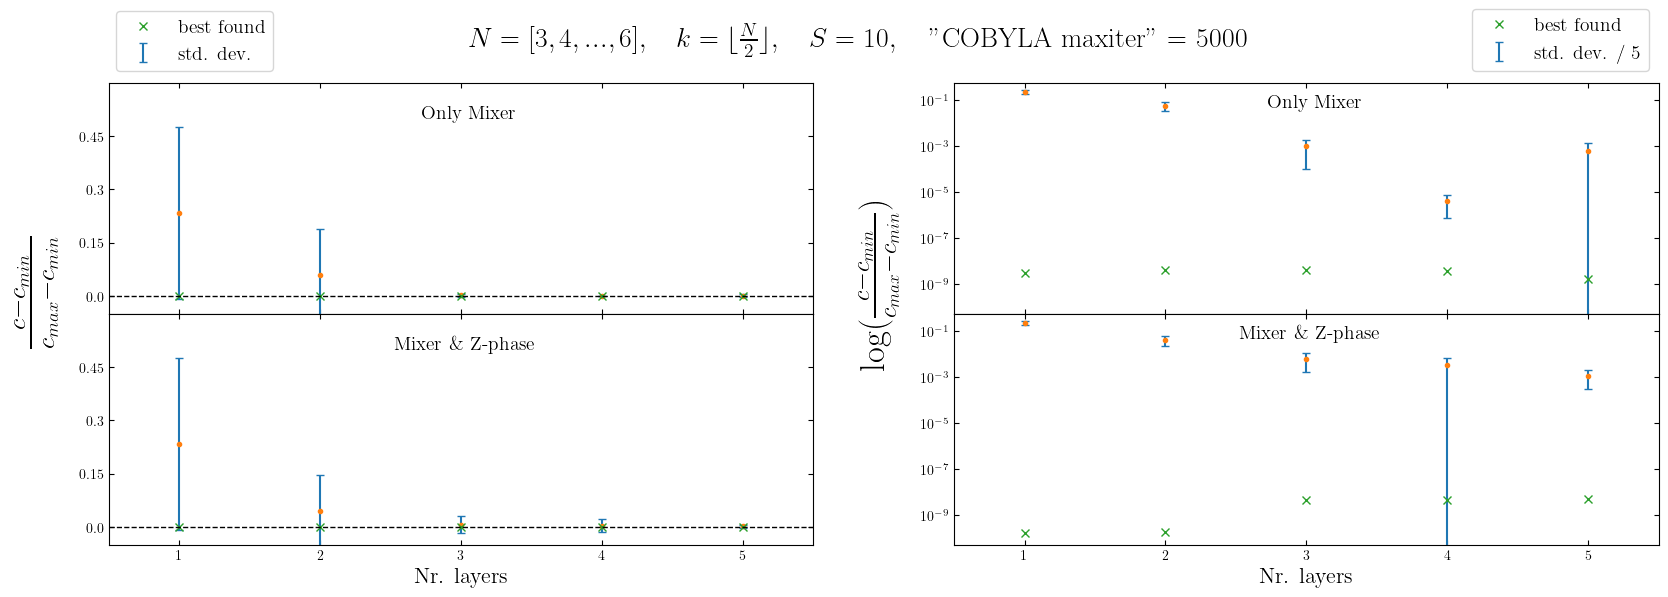

In [85]:
fig, ax = plt.subplots(2,2, figsize=(20,6))
fig.suptitle(r'$N=[3,4,...,6], \quad k=\lfloor\frac{N}{2}\rfloor, \quad S=10, \quad$ "COBYLA maxiter" = 5000',size=20)
plt.subplots_adjust(hspace=0)
# Shared x-values
n_layers = [1 + i for i in range(len(list(final_results_1.keys())))]
err_scaling = 1

# Plottig stuff
ax[0,0].errorbar(n_layers, [final_results_1[key][0] for key in list(final_results_1.keys())], yerr = [err_scaling*final_results_1[key][1] for key in list(final_results_1.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[0,0].plot(n_layers,[final_results_1[key][0] for key in list(final_results_1.keys())], 'o', ms=3)
ax[0,0].plot(n_layers,[final_results_1[key][2] for key in list(final_results_1.keys())], 'x', ms=6, label='best found')

ax[1,0].errorbar(n_layers, [final_results_2[key][0] for key in list(final_results_2.keys())], yerr = [err_scaling*final_results_2[key][1] for key in list(final_results_2.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[1,0].plot(n_layers,[final_results_2[key][0] for key in list(final_results_2.keys())], 'o', ms=3)
ax[1,0].plot(n_layers,[final_results_2[key][2] for key in list(final_results_2.keys())], 'x', ms=6, label='best found')


ax[0,0].text(2.725,0.5,'Only Mixer',size=14)
ax[1,0].text(2.525,0.5,r'Mixer \& Z-phase',size=14)
#ax[2,0].text(2.425,0.5,'Mixer, Z-phase \& Cost',size=14)

_y_ticks_ = [0.0,0.15,0.30,0.45]
for _ax_ in range(2):
    ax[_ax_,0].set_xlim(0.5,5.5)
    ax[_ax_,0].set_ylim(-0.05,0.6)
    ax[_ax_,0].hlines(0,0.5,5.5, ls='--',color='k',lw=1)
    ax[_ax_,0].set_yticks(_y_ticks_)
    ax[_ax_,0].set_yticklabels([str(v) for v in _y_ticks_])
    ax[_ax_,0].set_xticklabels([])

ax[0,0].legend(loc=(0.01,1.05),fontsize=14)

ax[1,0].set_xticks(n_layers)
ax[1,0].set_xticklabels([str(layer) for layer in n_layers])
ax[1,0].set_xlabel(r'Nr. layers', size=16)
ax[0,0].text(-0.2, -0.1, r'$\frac{c-c_{min}}{c_{max}-c_{min}}$', rotation=90, size = 27)



##################################################################################
################################# RHS ############################################
##################################################################################

err_scaling *= 0.2
# Plottig stuff
ax[0,1].errorbar(n_layers, [final_results_1[key][0] for key in list(final_results_1.keys())], yerr = [err_scaling*final_results_1[key][1] for key in list(final_results_1.keys())], capsize=3, ls='None', label=f'std. dev. / 5')
ax[0,1].plot(n_layers,[final_results_1[key][0] for key in list(final_results_1.keys())], 'o', ms=3)
ax[0,1].plot(n_layers,[final_results_1[key][2] for key in list(final_results_1.keys())], 'x', ms=6, label='best found')

ax[1,1].errorbar(n_layers, [final_results_2[key][0] for key in list(final_results_2.keys())], yerr = [err_scaling*final_results_2[key][1] for key in list(final_results_2.keys())], capsize=3, ls='None', label=f'std. dev. / 5')
ax[1,1].plot(n_layers,[final_results_2[key][0] for key in list(final_results_2.keys())], 'o', ms=3)
ax[1,1].plot(n_layers,[final_results_2[key][2] for key in list(final_results_2.keys())], 'x', ms=6, label='best found')




ax[0,1].text(2.725,0.05,'Only Mixer',size=14)
ax[1,1].text(2.525,0.05,r'Mixer \& Z-phase',size=14)
#ax[2,1].text(2.425,0.05,'Mixer, Z-phase \& Cost',size=14)

for _ax_ in range(2):
    ax[_ax_,1].set_xlim(0.5,5.5)
    ax[_ax_,1].set_ylim(0.5e-10,6e-1)
    ax[_ax_,1].set_xticklabels([])
    ax[_ax_,1].set_yscale('log')

ax[0,1].legend(loc=(0.735,1.05),fontsize=14)
ax[1,1].set_xticks(n_layers)
ax[1,1].set_xticklabels([str(layer) for layer in n_layers])
ax[1,1].set_xlabel(r'Nr. layers', size=16)
ax[1,1].text(-0.2, 0.01, r'$\log(\frac{c-c_{min}}{c_{max}-c_{min}})$', rotation=90, size = 25)


#plt.savefig('out_4.png', dpi=300)
plt.show()

array([318165397,  44917123])

In [3]:
import numpy as np
def generate_bit_string_permutations(n: int) -> str:
    """
    
    """
    num_permutations = 2 ** n
    for i in range(num_permutations):
        _binary_string_ = bin(i)[2:].zfill(n)
        yield np.array([int(bit) for bit in _binary_string_])

for perm in generate_bit_string_permutations(4):
    print(perm, type(perm))

[0 0 0 0] <class 'numpy.ndarray'>
[0 0 0 1] <class 'numpy.ndarray'>
[0 0 1 0] <class 'numpy.ndarray'>
[0 0 1 1] <class 'numpy.ndarray'>
[0 1 0 0] <class 'numpy.ndarray'>
[0 1 0 1] <class 'numpy.ndarray'>
[0 1 1 0] <class 'numpy.ndarray'>
[0 1 1 1] <class 'numpy.ndarray'>
[1 0 0 0] <class 'numpy.ndarray'>
[1 0 0 1] <class 'numpy.ndarray'>
[1 0 1 0] <class 'numpy.ndarray'>
[1 0 1 1] <class 'numpy.ndarray'>
[1 1 0 0] <class 'numpy.ndarray'>
[1 1 0 1] <class 'numpy.ndarray'>
[1 1 1 0] <class 'numpy.ndarray'>
[1 1 1 1] <class 'numpy.ndarray'>
